# <h1 align="center"> Laboratorio di Algoritmi e Strutture dati </h1>
# <h1 align="center"> Leonardo Guglielmi (7046931) </h1>
# <h1 align="center"> Esercizio 2: confronto tra Selectionsort e Mergesort </h1>

# Indice:
1. Obiettivo
2. Teoria
3. Comportamento atteso
4. Descrizione dell'esperimento
5. Descrizione codice
6. Deduzioni sui risultati sperimentali

## 1.Obiettivo
L'obiettivo dell'esperimento è quello di confrontare i due algoritmi di ordinamento Insertionsort e Mergesort in termini del tempo impiegato a ordinare una serie di sequenze di valori. 


## 2.Teoria
Gli algoritmi di ordinamento sono una categoria di algoritmi che, data una sequenza di valori, permettono di ordinarne gli elementi.
Ognuno di essi comporta dei vantaggi e degli svantaggi nel suo utilizzo, nello specifico:


### Insertionsort
L' insertionsort va confrontare un elemento A[j] con quelli che lo precedono, i quali risulteranno già ordinati.
Iniziando da quello immediatamente precedente A[j-1], inizio a spostare tutti gli elementi in avanti di una posizione fino a che non trovo un elemento che è più piccolo o uguale all'elemento A[j], in quel caso scambio i due elementi.
Il concetto dietro è che, prendendo una sequenza già ordinata, vado a trovare la posizione in cui dovrebbe essere inserito un nuovo valore affinché la sequenza aumentata risulti ordinata.
Poiché per ogni elemento devo osservare tutta la sotto-sequenza che la precede, ho che il tempo di esecuzione dell'algoritmo insertionsort nel caso peggiore è $ \theta(n^2) $, tuttavia le costanti di esecuzione sono piccole.

### Mergesort
Il mergesort è un algoritmo del tipo divide-et-impera, ovvero va a dividere l'insieme dei dati da ordinare in insiemi sempre più piccoli fino ad arrivare a un caso base, dopodiché ricombina i risultati.
Più precisamente va a dividere la sequenza A[p..r] in sotto-sequenze A[p...q] e A[q+1...r] sempre più piccole fino ad arrivare alla sequenza unitaria (ovvero la sequenza composta da un solo elemento), dopodiché l'algoritmo risale l'albero di ricorsione e va a unire le sotto-sequenze andando a inserirne gli elementi nella sequenza ricombinata in modo ordinato.
Il concetto dietro è quindi quello di dividere la sequenza in sequenze sempre più piccole e dopo aver fatto ciò ordinare in modo ricorsivo le varie sotto-sequenze.
Dalla struttura dell'algoritmo si ha dunque che il tempo di esecuzione è $ \theta(n\cdot lg\ n)$.


## 3.Comportamento atteso
Basandoci sulla teoria ci aspettiamo che l'algoritmo Insertionsort abbia un tempo di esecuzione minore rispetto al Mergesort per sequenze di valori più corte grazie alla dimensione delle costanti, tuttavia per sequenze di dimensione sempre maggiore ci aspettiamo che il Mergesort grazie alla sua struttura ricorsiva riesca a ordinare in un tempo minore.


## 4.Descrizione dell'esperimento
L'esperimento consiste nell'impostare una dimensione delle sequenze sempre maggiore (fino a 1500 elementi) e per ogni iterazione andare a generare randomicamente un numero fissato di array di quella dimensione (precisamente si generano 30 vettori per ogni iterazione), dopodichè si eseguono entrambi gli algoritmi sulle sequenze generate in modo tale da poter calcolare il tempo medio di esecuzione per una certa lunghezza.


Le specifiche tecniche della macchina sulla quale viene svolto l'esperimento sono:
- modello: Asus vivobook S15
- sistema operativo host: openSuse microOs (linux)
- sistema operativo container: archLinux
- processore: Intel Core i7-8565U 1.80 GHZ
- RAM: 8 GB DDR-4
- disco: ssd Kingstone A2000 256 GB


## 5.Descrizione codice
### import
Alcuni import di librerie utilizzate negli esperimenti

In [10]:
import numpy as np
import math
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import matplotlib.patches as mpatch

### Insertionsort
L'algoritmo consiste di un ciclo esterno (quello con indice _i_ ) che va a selezionare un elemento del vettore per volta e tale elemento viene salvato temporaneamente in una variabile _key_, dopodichè il ciclo più interno (quello con indice _j_ ) andrà a determinare dove devo inserire il valore determinato dall'indice _i_.
Infine vado a mettere enlla giusta posizione l'elemento precedentemente salvato in _key_.

In [11]:
def insertionsort(array):
    for i in range(array.size):
        key = array[i]
        j = i-1
        while j >= 0 and array[j] > key:
            array[j+1] = array[j]
            j = j-1
        array[j+1] = key

### Mergesort
Ho una funzione ___mergesort()___ il cui unico scopo è solo quello di agire da interfaccia.\
Dopodichè ho una funzione ___merge_sort()___ che, se gli indici ricevuti come parametri _p,r_ non vanno a selezionare il vettore unitario, vanno prima ad eseguire una chiamata ricorsiva nei sotto-array usando un nuovo indice _q_ calcolato come la media, dopodichè esegue la funzione _merge()_.\
Infine la funzione __merge()__ va a riordinare le sotto-sequenze specifiate dagli indici _p,q,r_ passati come parametri usando due vettori ausiliari _L_ e _R_, più precisamente andrà a salvare in quest'ultimi i valori della sotto-sequenza sinistra e della sotto-sequenza destra e dopo ciò confronta gli elementi dei due vettori ausiliari servendosi di due indici, andando ad inserire nel vettore originale l'elemento minore tra _L[i]_ e _R[j]_.

In [12]:
# funzione definita solo per mascherare ed automatizzare la scelta degli indici p ed r
def mergesort(array):
    merge_sort(array, 0, array.size)


# questo dovrebbe funzionare correttamente
def merge_sort(array, p, r):
    if array[p:r].size > 1:
        q = int((p + r)/2)
        merge_sort(array, p, q)
        merge_sort(array, q, r)
        merge(array, p, q, r)


def merge(array, p, q, r):
    n1 = q-p
    n2 = r-q
    L = np.zeros(n1+1)
    R = np.zeros(n2+1)

    for i in range(n1):
        L[i] = array[p+i]
    for j in range(n2):
        R[j] = array[q+j]
    L[n1] = math.inf
    R[n2] = math.inf

    i=0
    j=0
    for k in range(p, r):
        if L[i] < R[j]:
            array[k] = L[i]
            i = i+1
        elif R[j] != math.inf:
            array[k] = R[j]
            j = j+1
        

### Codice esperimento
Il codice è composto da un insieme di variabili in cui andare a salvare i vari risultati (_insertionsortResults,mergesortResults,insertionsortTotTime,insertionsortAvgTime,mergesortTotTime,mergesortAvgTime_).
Si vanno a svolgere due cicli: quello più esterno andrà ad incrementare la dimensione delle sequenze ad ogni iterazione, mentre quello più interno andrà a generare per un numero prefissato di volte delle sequenze casuali ed eseguirà su di esse gli algoritmi, andando anche a registrare il tempo per l'ordinamento.

In [13]:
iters = 1200 # numero di iterazioni
num_exec = 100 # numero di esecuzioni per ciascuna lunghezza

# vettori per memorizzare i vari tempi medi di esecuzione dei due algoritmi
insertionsort_results = np.zeros(iters)
mergesort_results = np.zeros(iters)

# variabili per memorizzare il tempo totale e il tempo medio per iterazione impiegato da ciascun algoritmo
insertionsort_tot_time = 0
insertionsort_avg_time = 0
mergesort_tot_time = 0
mergesort_avg_time = 0

# genero vettori di dimensione crescente per testare gli algoritmi
for i in range(iters):
    for j in range(num_exec):
        # genero vettori di dimensione crescente per testare gli algoritmi
        x1 = np.random.randint(i, size=i)  # inoltre l'insieme di valori che gli elementi dei vettori possono assumere
        x2 = x1.copy()
    
        # registro i tempi di esecuzione del insertionsort facendo una differenza tra il timestamp dopo aver eseguito l'algoritmo e il timestamp prima di eseguire l'algoritmo
        insertionsort_timestamp = timer()
        insertionsort(x1)
        insertionsort_iter_time = timer() - insertionsort_timestamp
        insertionsort_results[i] += insertionsort_iter_time
        insertionsort_tot_time += insertionsort_iter_time
    
        # stessa procedura per il calcolo del tempo di esecuzione del mergesort usata per l' insertionsort
        mergesort_timestamp = timer()
        mergesort(x2)
        mergesort_iter_time = timer() - mergesort_timestamp
        mergesort_results[i] += mergesort_iter_time
        mergesort_tot_time += mergesort_iter_time

    # calcolo il tempo medio
    insertionsort_results[i] /= num_exec
    mergesort_results[i] /= num_exec

# calcolo il tempo medio di esecuzione per iterazione
insertionsort_avg_time = insertionsort_tot_time/(iters*num_exec)
mergesort_avg_time = mergesort_tot_time/(iters*num_exec)    
        

### Stampa dei risultati
Stampo a schermo i vari tempi registrati durante l'esperimento e il grafico relativo ai tempi di esecuzione degli algoritmi per ogni dimensione delle sequenze ordinate.
Inoltre mostro un grafico che si concentra sulle prime 200 iterazioni per osservare meglio il comportamento dei due algoritmi per gli array di dimensione minore.

--- InsertionSort
tempo di esecuzione totale per 1200 iterazioni: 4235.8149 secondi 
tempo di esecuzione medio per iterazione: 0.0353 secondi
--- MergeSort
tempo di esecuzione totale per 1200 iterazioni: 668.1352 secondi
tempo di esecuzione medio per iterazione: 0.0056 secondi


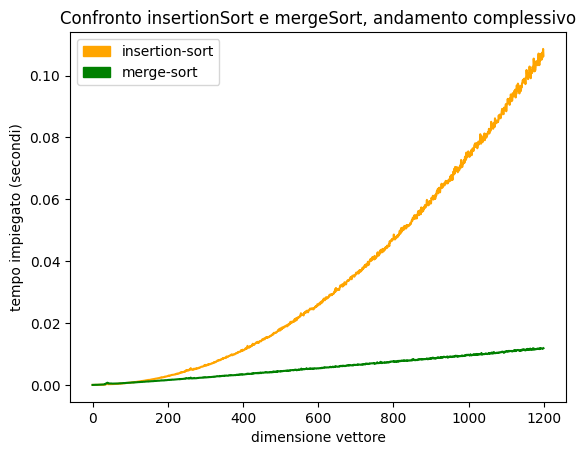

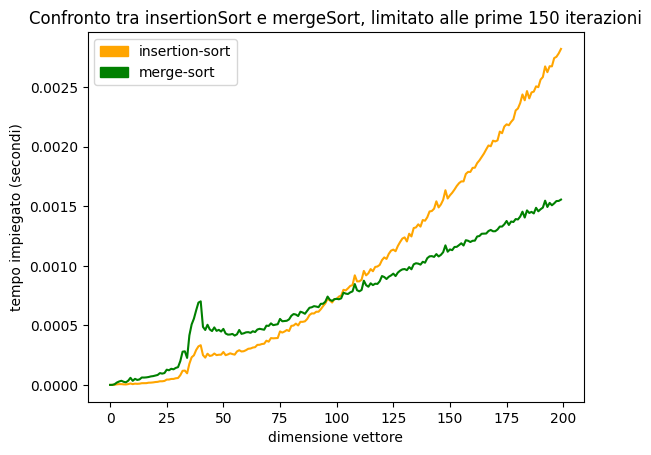

In [14]:
# stampo le statistiche temporali dell'esperimento
print("--- InsertionSort")
print("tempo di esecuzione totale per", iters, "iterazioni:",f'{insertionsort_tot_time:.4f}', "secondi ")
print("tempo di esecuzione medio per iterazione:",f'{insertionsort_avg_time:.4f}', "secondi")

print("--- MergeSort")
print("tempo di esecuzione totale per", iters, "iterazioni:", f'{mergesort_tot_time:.4f}', "secondi")
print("tempo di esecuzione medio per iterazione:",f'{mergesort_avg_time:.4f}', "secondi")

# vettore delle ascisse
x_axis = [i for i in range(iters)]

# creazione del grafico relativo all'andamento complessivo
graph1, plot1 = plt.subplots()
plot1.plot(x_axis, insertionsort_results, label="insertionSort", color="orange")
plot1.plot(x_axis, mergesort_results, label="mergeSort", color="green")

plot1.set_title("Confronto insertionSort e mergeSort, andamento complessivo")
plot1.set_ylabel("tempo impiegato (secondi)")
plot1.set_xlabel("dimensione vettore")

# grafico limitato alle prime 200 iterazioni per osservare meglio il comportamento iniziale
graph2, plot2 = plt.subplots()
plot2.plot(x_axis[0:200], insertionsort_results[0:200] , label="insertionSort", color="orange")
plot2.plot(x_axis[0:200], mergesort_results[0:200], label="mergeSort", color="green")

plot2.set_title("Confronto tra insertionSort e mergeSort, limitato alle prime 150 iterazioni")
plot2.set_ylabel("tempo impiegato (secondi)")
plot2.set_xlabel("dimensione vettore")

# aggiungo a entrambi i grafici una piccola legenda visiva
insertionsort_patch = mpatch.Patch(color='orange', label='insertion-sort')
mergesort_patch = mpatch.Patch(color='green', label='merge-sort')
plot1.legend(handles=[insertionsort_patch,mergesort_patch])
plot2.legend(handles=[insertionsort_patch,mergesort_patch])

plt.show()

## Deduzioni sui risultati sperimentali
Come si può osservare dal grafico, l'insertionsort ha un andamento quadratico del tempo di esecusione, mentre il mergesort presenta un andamento più lineare, confermando quindi il costo atteso dai due algoritmi.
Dai dati ottenuti osserviamo come il mergesort abbia in generale dei tempi medi minori rispetto all'insertionsort: più precisamente il tempo medio di completamento è circa un settimo dei quello dell'insertionsort, mentre il tempo medio per iterazione risulta quasi 8 volte inferiore.
Tuttavia, nonostante per vettori di grandi dimenioni il mergesort risulti nettamente più efficiente, possiamo notare come l'insertionsort risulti più adatto per vettori di dimensione minore, fino a 90 elementi circa si hanno dei tempi di esecizione migliori con il selectionsort.